## E-commerce Shopping website Analytics

**Objective:** To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people

**Expectations:**

The project expects you to Analyze user behavior across different page categories, engagement time, and other features. Gain insights into factors influencing purchase decisions and identify areas for optimization. Formulate some hypotheses on the dataset and check if they are correct.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloading and reading the shopping csv file

In [7]:
df = pd.read_csv("shopping.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Unique number of values for specific categorical columns

In [9]:
columns_list = df[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                'Weekend', 'Revenue']]

for columns in columns_list.columns:
  unique_count = columns_list[columns].nunique()
  print(columns, "-", unique_count)

SpecialDay - 6
Month - 10
OperatingSystems - 8
Browser - 13
Region - 9
TrafficType - 20
VisitorType - 3
Weekend - 2
Revenue - 2


Checking for the presence of null values in dataset.

In [10]:
df.isna().isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


shape of the dataset

In [11]:
df.shape

(12330, 18)

summary statistics of the dataset

In [12]:
summary_df = df.describe()
summary_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Distribution of the numerical features in the dataset

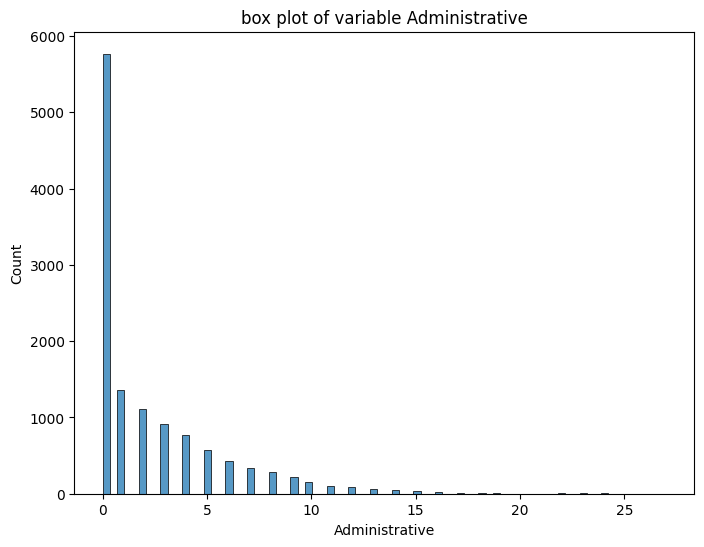

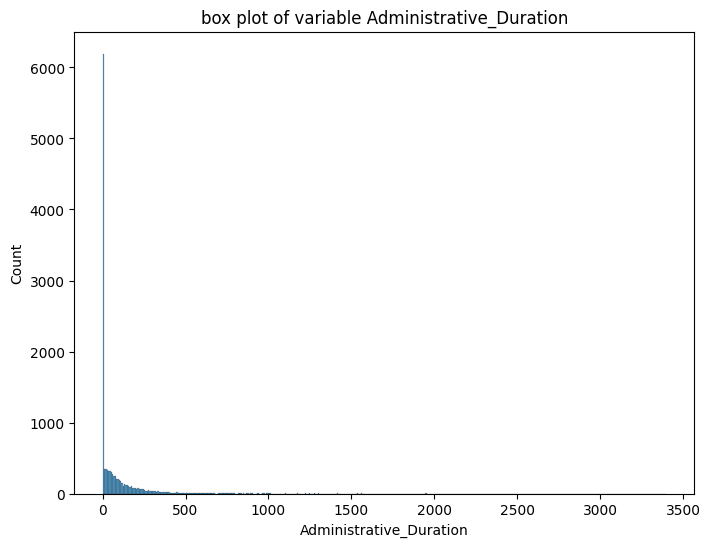

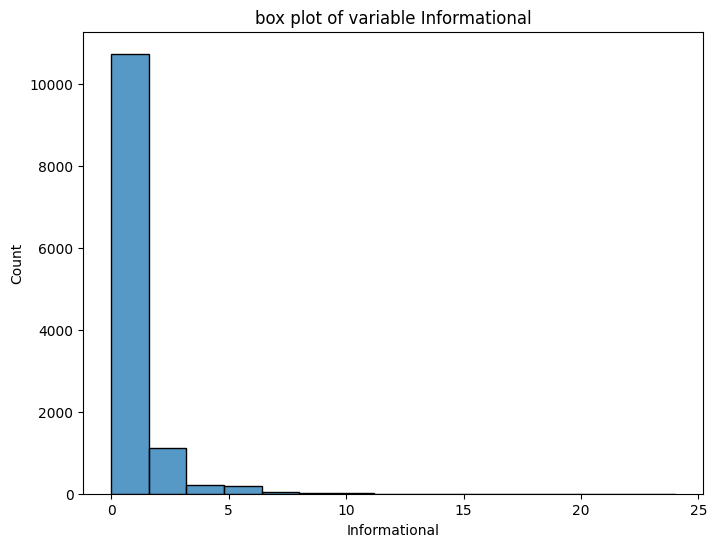

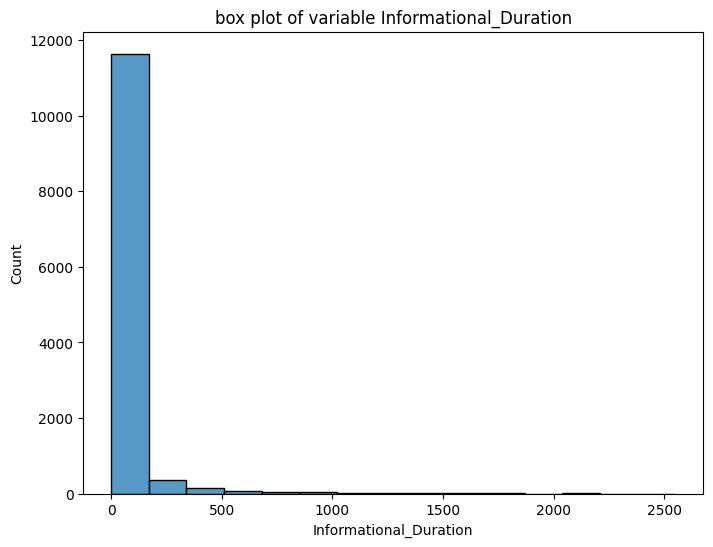

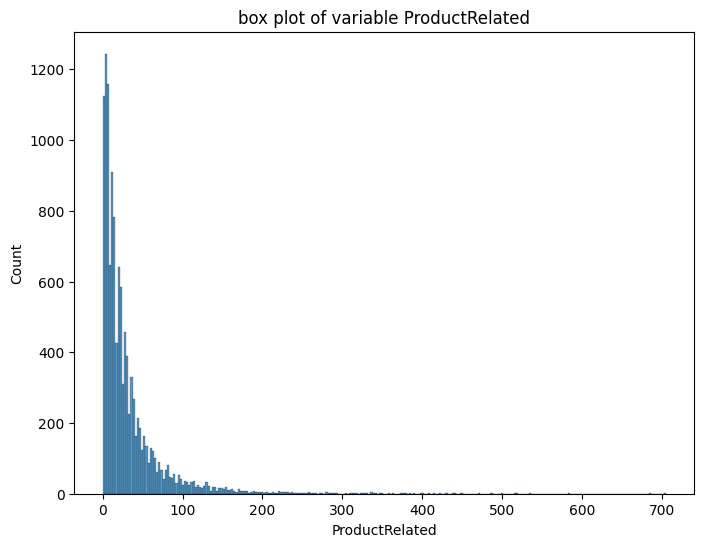

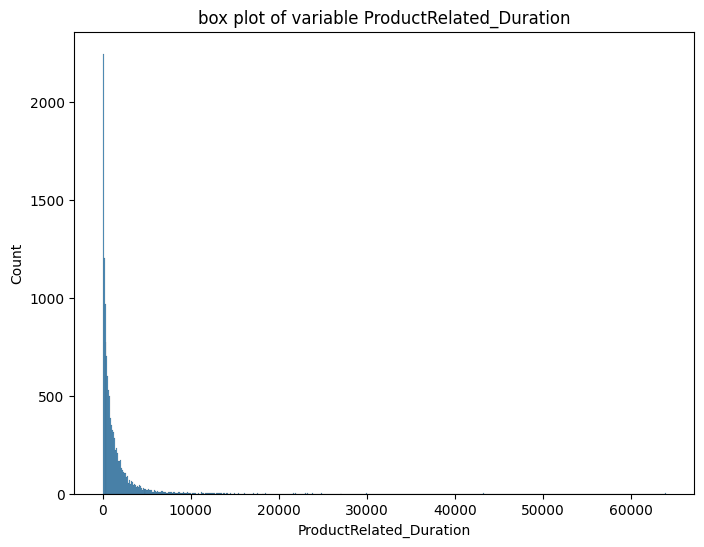

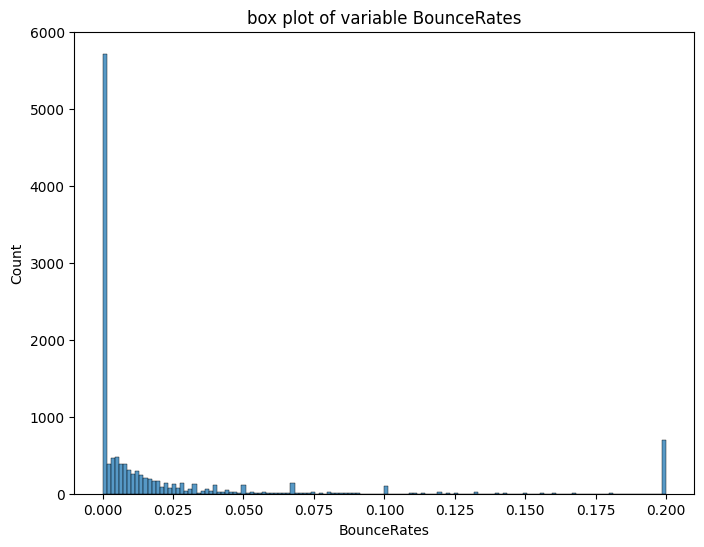

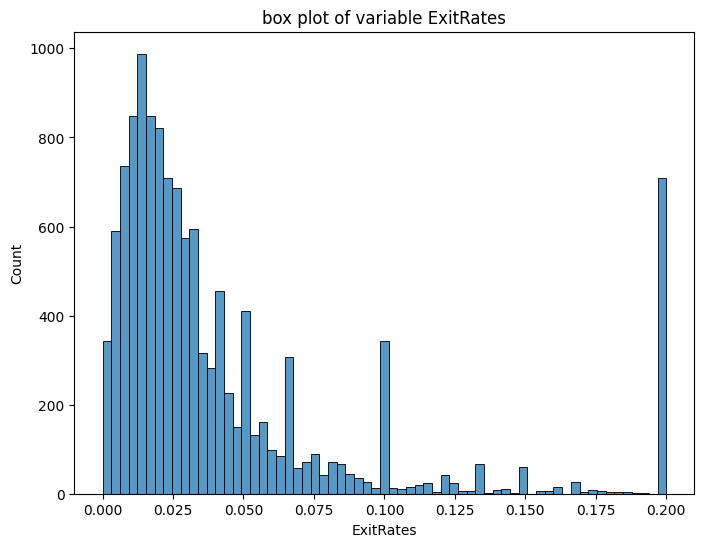

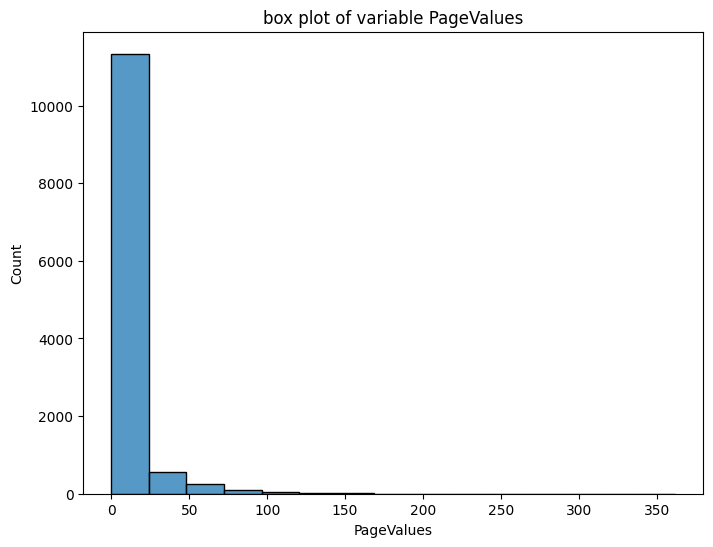

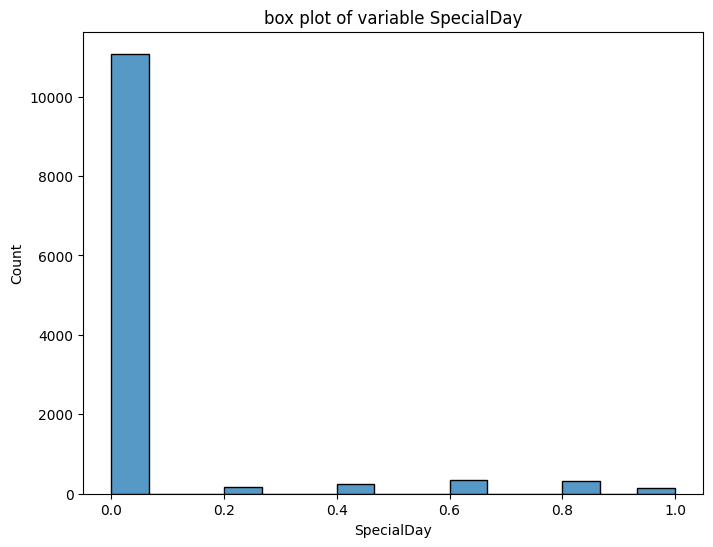

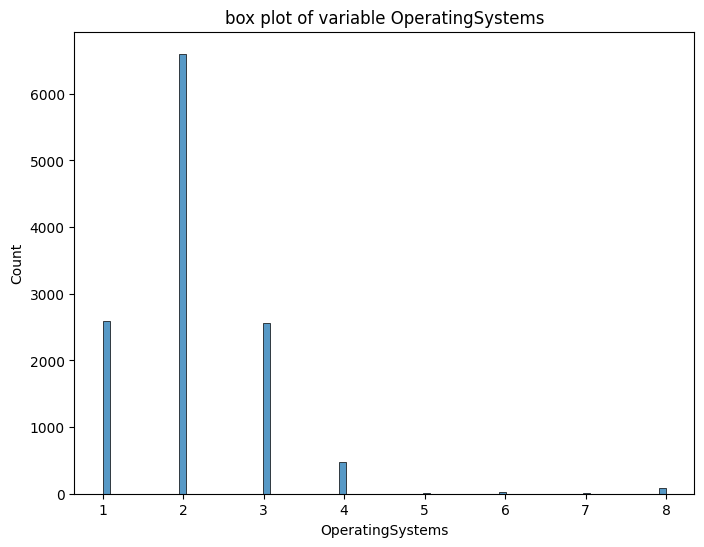

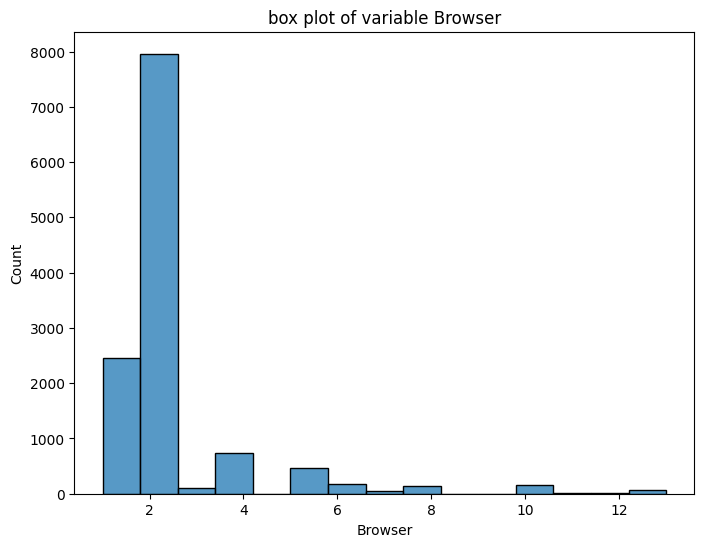

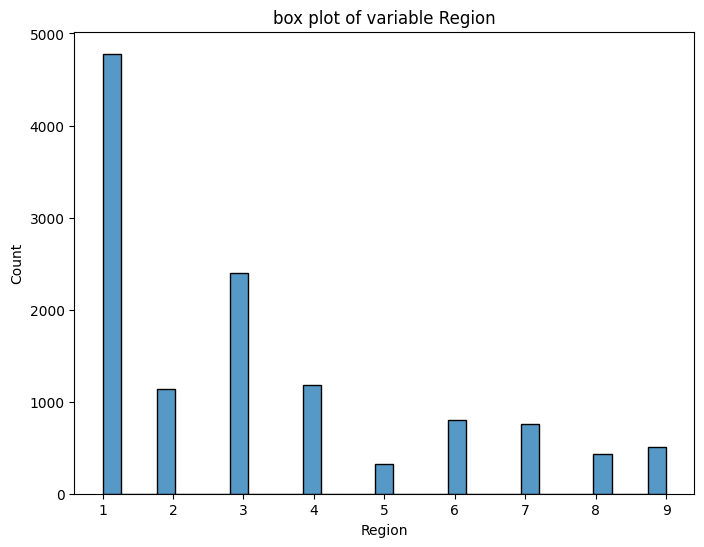

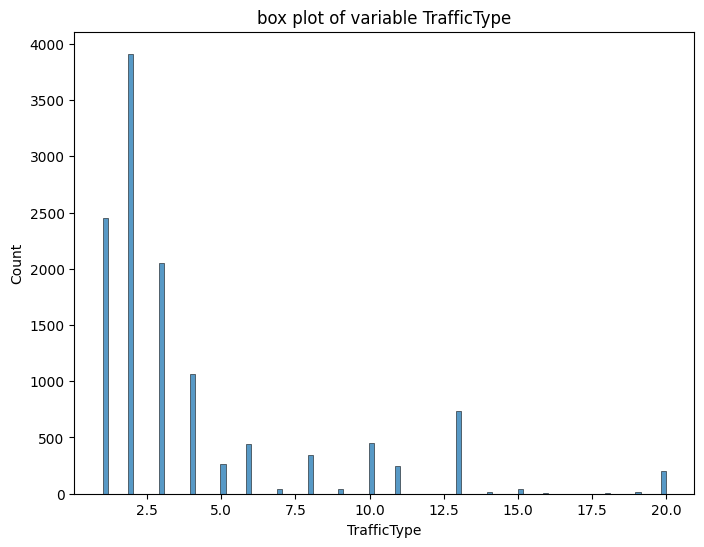

In [13]:
numeric_variables = df.select_dtypes(include = np.number).columns
numeric_df = df[numeric_variables]

for variable in numeric_df:
  plt.figure(figsize = (8, 6))
  sns.histplot(data = numeric_df[variable])
  plt.title(f"box plot of variable {variable}")

Checking for the presence of outliers in the dataset

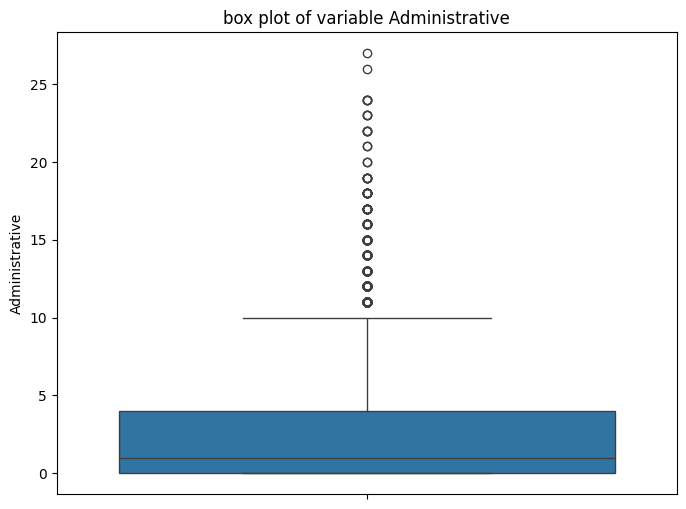

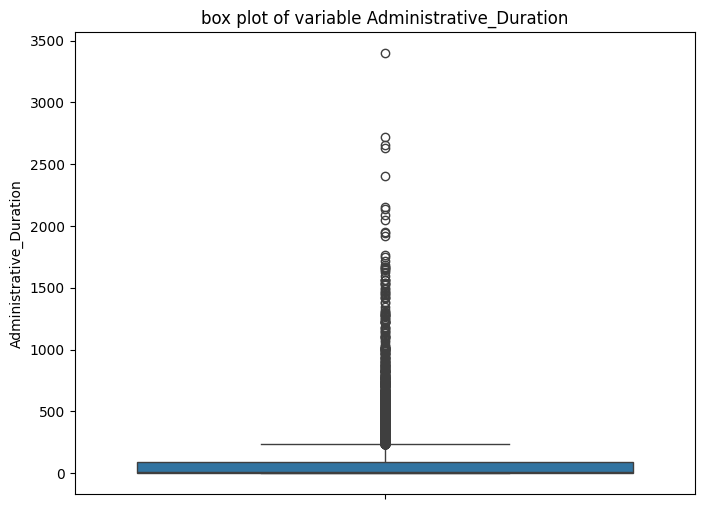

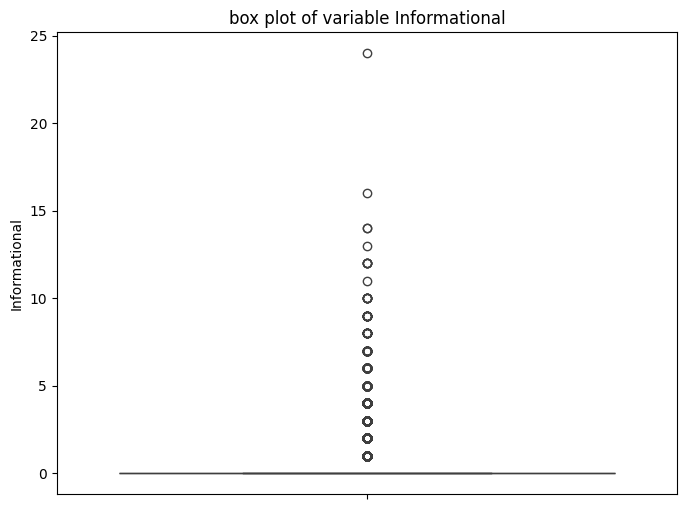

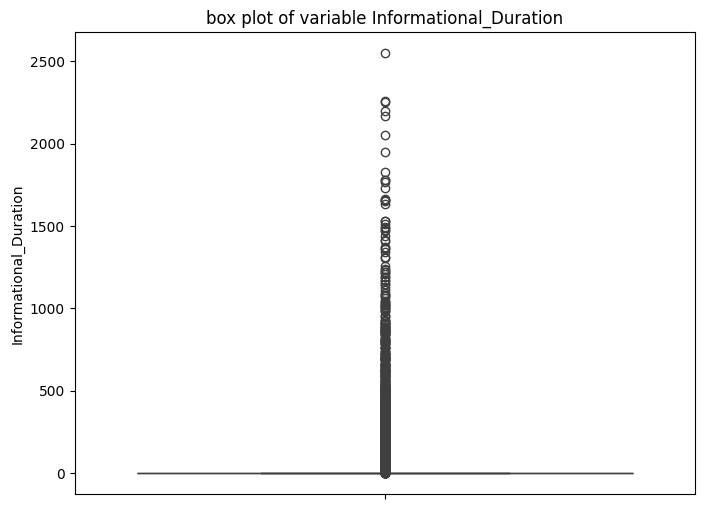

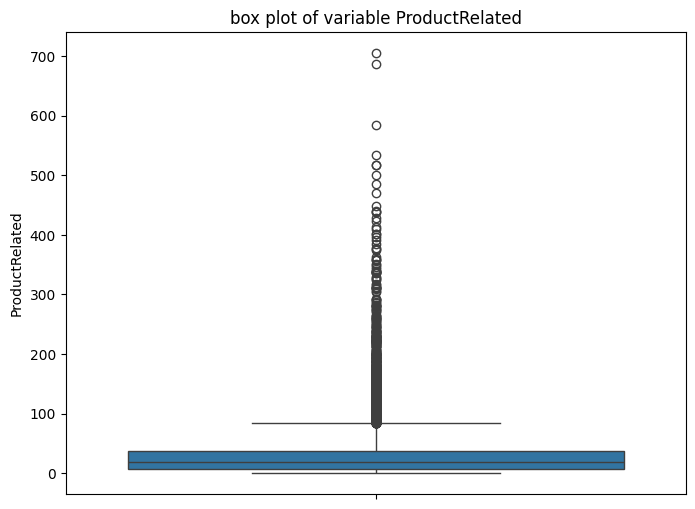

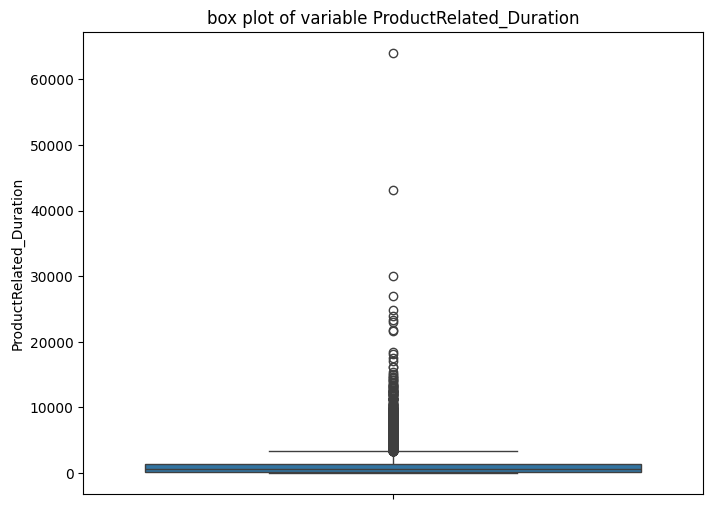

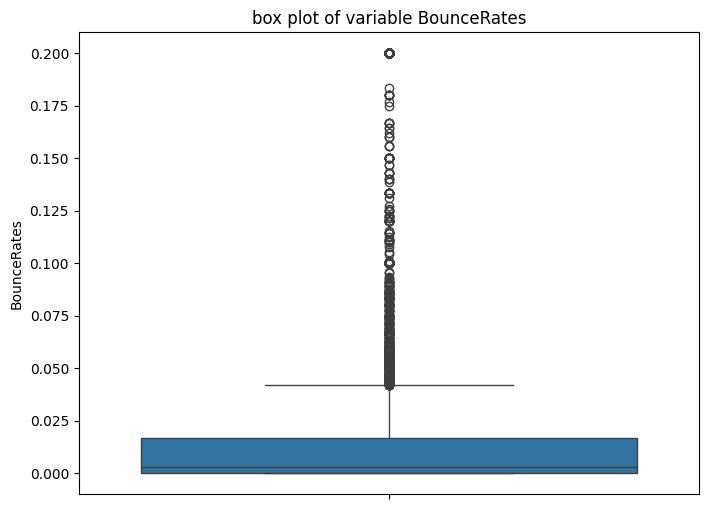

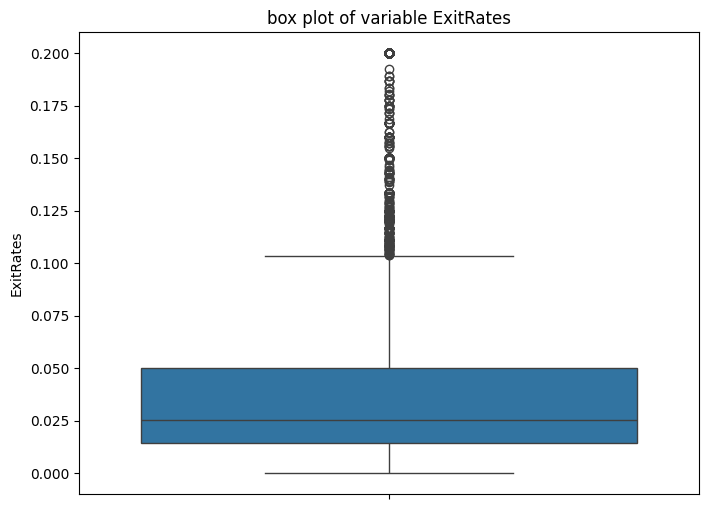

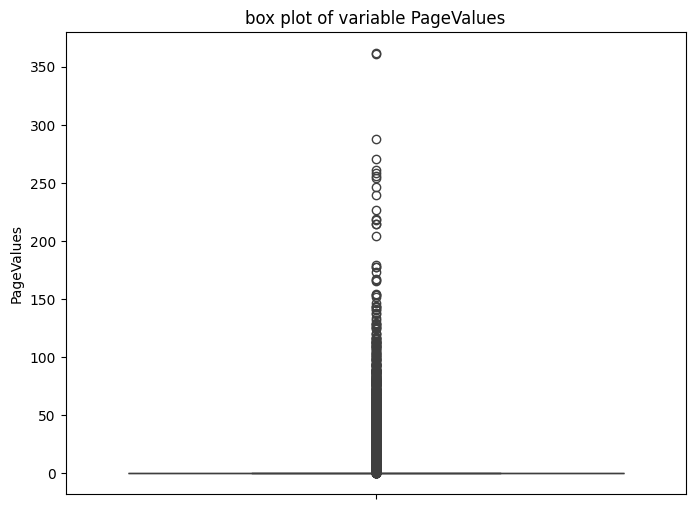

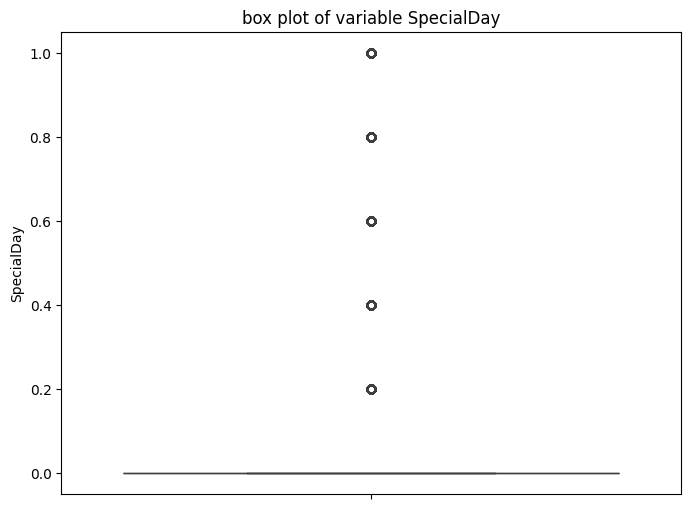

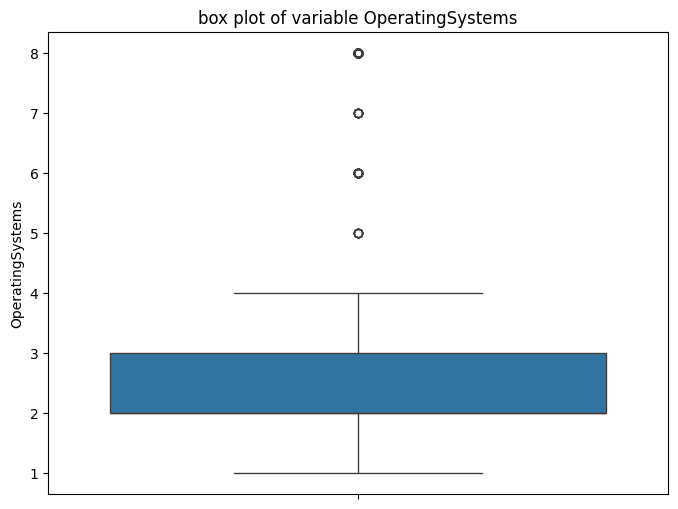

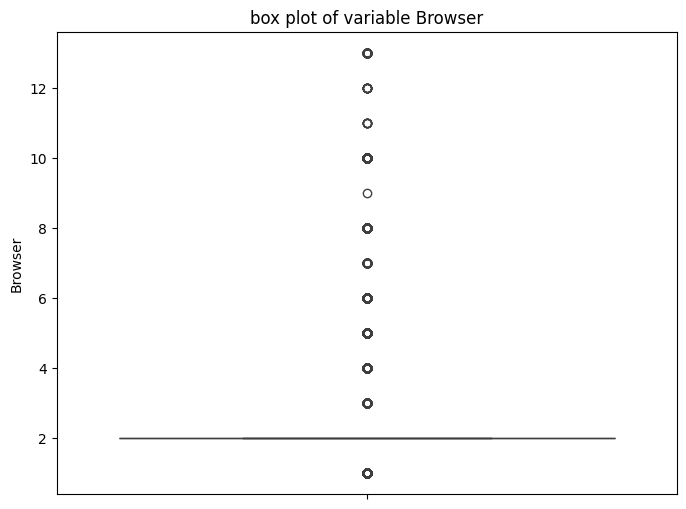

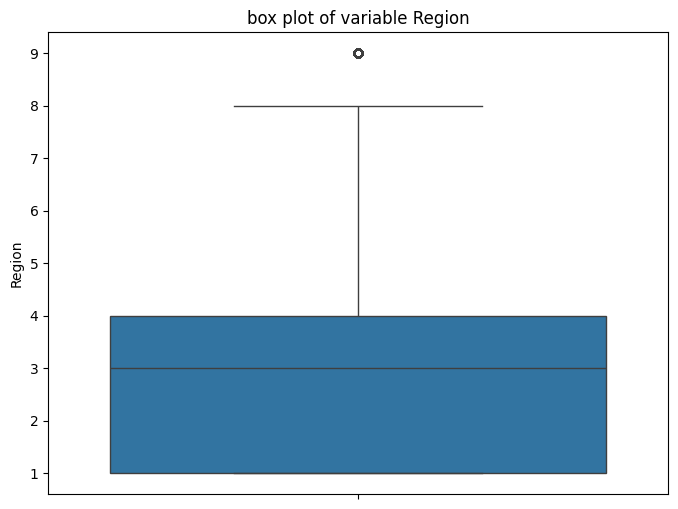

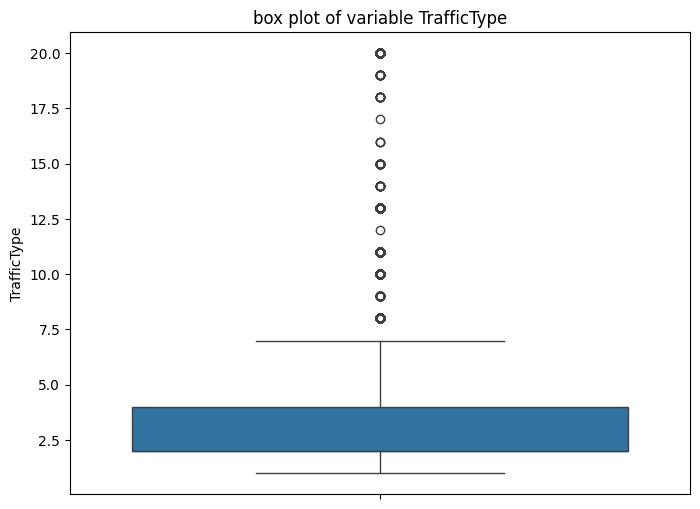

In [42]:
numeric_variables = df.select_dtypes(include = np.number).columns
numeric_df = df[numeric_variables]

for variable in numeric_df:
  plt.figure(figsize = (8, 6))
  sns.boxplot(data = numeric_df[variable])
  plt.title(f"box plot of variable {variable}")

Calculating Total number of outliers

In [9]:
Q1 = summary_df[numeric_variables].loc["25%"]
Q3 = summary_df[numeric_variables].loc["75%"]

IQR = Q3- Q1
print(IQR)

Administrative                4.000000
Administrative_Duration      93.256250
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               31.000000
ProductRelated_Duration    1280.019714
BounceRates                   0.016813
ExitRates                     0.035714
PageValues                    0.000000
SpecialDay                    0.000000
OperatingSystems              1.000000
Browser                       0.000000
Region                        3.000000
TrafficType                   2.000000
dtype: float64


In [10]:
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" : lower_bound, "UpperBound": upper_bound})
print(bounds_df)

                          LowerBound   UpperBound
Administrative             -6.000000    10.000000
Administrative_Duration  -139.884375   233.140625
Informational               0.000000     0.000000
Informational_Duration      0.000000     0.000000
ProductRelated            -39.500000    84.500000
ProductRelated_Duration -1735.892070  3384.186784
BounceRates                -0.025219     0.042031
ExitRates                  -0.039286     0.103571
PageValues                  0.000000     0.000000
SpecialDay                  0.000000     0.000000
OperatingSystems            0.500000     4.500000
Browser                     2.000000     2.000000
Region                     -3.500000     8.500000
TrafficType                -1.000000     7.000000


In [11]:
outliers_lower = (summary_df[numeric_variables] < lower_bound).sum()
outliers_upper = (summary_df[numeric_variables] > upper_bound).sum()
total_outliers = outliers_lower  + outliers_upper

ouliers_count_df = pd.DataFrame({"LowerBound_outliers" :outliers_lower, "UpperBound_outliers" :outliers_upper, "Total" : total_outliers})
print(ouliers_count_df)

                         LowerBound_outliers  UpperBound_outliers  Total
Administrative                             0                    2      2
Administrative_Duration                    0                    2      2
Informational                              0                    4      4
Informational_Duration                     0                    4      4
ProductRelated                             0                    2      2
ProductRelated_Duration                    0                    2      2
BounceRates                                0                    3      3
ExitRates                                  0                    2      2
PageValues                                 0                    4      4
SpecialDay                                 0                    4      4
OperatingSystems                           0                    2      2
Browser                                    2                    3      5
Region                                     0       

Understanding correaltion between multiple numerical features

In [14]:
variables_1 = numeric_df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']]
spearman_corr = variables_1.corr(method = 'spearman')
spearman_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
Administrative,1.000000,0.940725,0.369194,0.362861,0.460204,0.421613,-0.155219,-0.434389
Administrative_Duration,0.940725,1.000000,0.357150,0.352060,0.430072,0.413765,-0.163609,-0.437912
Informational,0.369194,0.357150,1.000000,0.950958,0.368673,0.367522,0.005753,-0.185691
Informational_Duration,0.362861,0.352060,0.950958,1.000000,0.361032,0.362720,-0.002474,-0.200056
ProductRelated,0.460204,0.430072,0.368673,0.361032,1.000000,0.882672,-0.052305,-0.518920
ProductRelated_Duration,0.421613,0.413765,0.367522,0.362720,0.882672,1.000000,-0.079768,-0.476935
BounceRates,-0.155219,-0.163609,0.005753,-0.002474,-0.052305,-0.079768,1.000000,0.602276
ExitRates,-0.434389,-0.437912,-0.185691,-0.200056,-0.518920,-0.476935,0.602276,1.000000


Undersatnding correlation between Pages visits and Page values

In [18]:
variables_2 = numeric_df[['Administrative', 'Informational', 'ProductRelated', 'PageValues']]
spearman_corr = variables_2.corr(method = 'spearman')
spearman_corr

,Administrative,Informational,ProductRelated,PageValues
Administrative,1.000000,0.369194,0.460204,0.328350
Informational,0.369194,1.000000,0.368673,0.219471
ProductRelated,0.460204,0.368673,1.000000,0.341975
PageValues,0.328350,0.219471,0.341975,1.000000


Scatter plot showing relationship between Pages visited and bounce rate

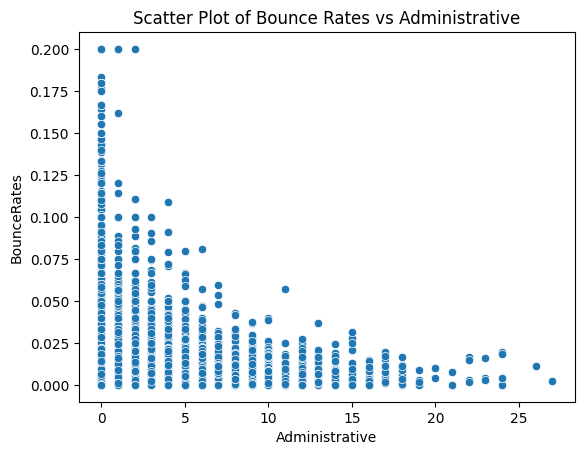

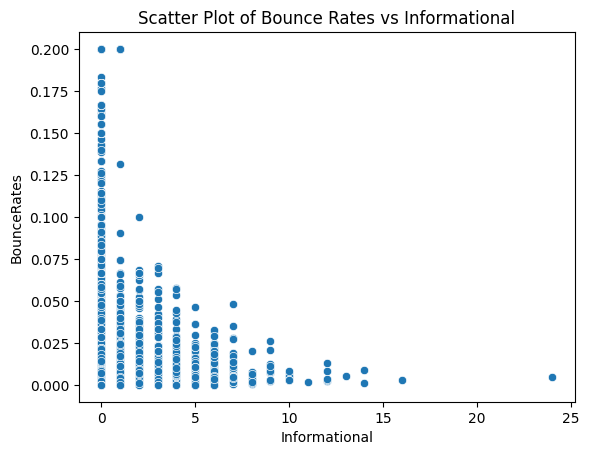

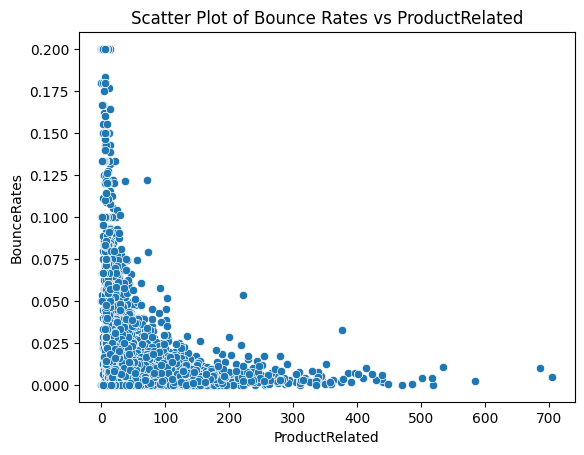

In [23]:
columns_to_plot = ['Administrative', 'Informational', 'ProductRelated']

for col in columns_to_plot:
  sns.scatterplot(x=df[col], y=df['BounceRates'])
  plt.title(f'Scatter Plot of Bounce Rates vs {col}')
  plt.show()

Scatter plot showing relationship between Pages visited and Exit rate

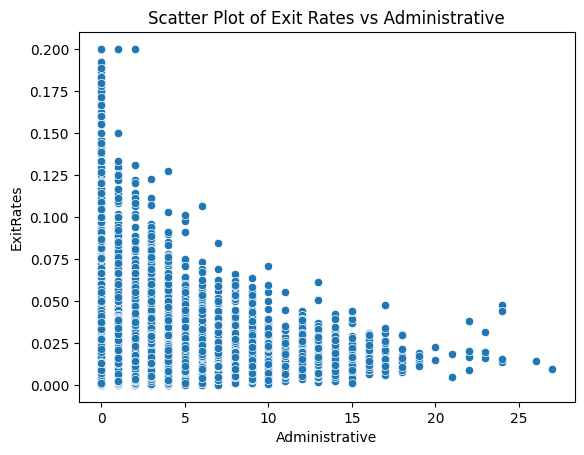

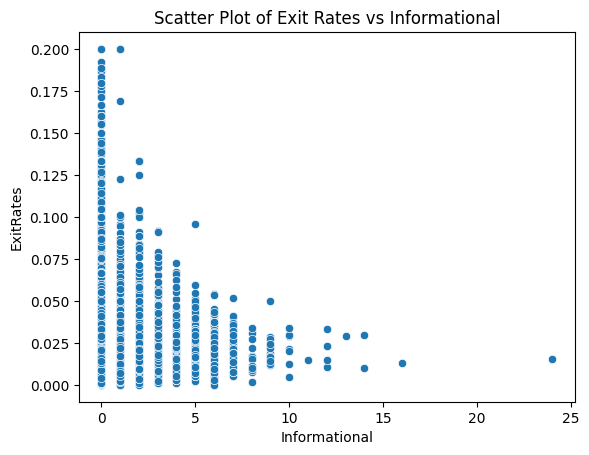

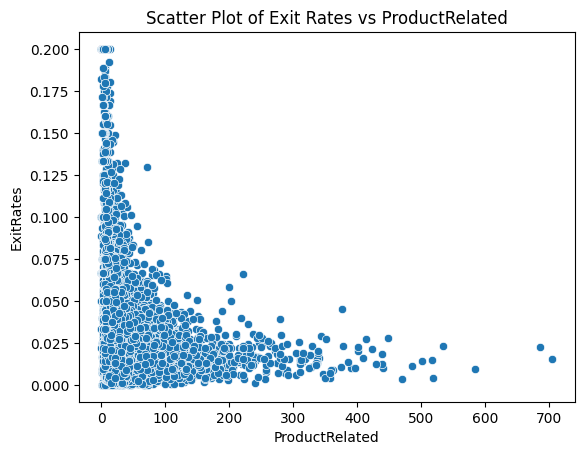

In [24]:
columns_to_plot = ['Administrative', 'Informational', 'ProductRelated']

for col in columns_to_plot:
  sns.scatterplot(x=df[col], y=df['ExitRates'])
  plt.title(f'Scatter Plot of Exit Rates vs {col}')
  plt.show()

Total pages visited & Individual Revenue contribution for each type of Operating system

In [24]:
pages_under_OS = df.groupby('OperatingSystems')[['Administrative', 'Informational', 'ProductRelated', 'Revenue']].sum()
pages_under_OS = pages_under_OS.sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False).reset_index()
pages_under_OS

,OperatingSystems,Administrative,Informational,ProductRelated,Revenue
0,2,15620,3329,243291,1155
1,3,5930,1402,67616,268
2,1,5756,1275,61224,379
3,4,1049,171,17317,85
4,8,123,17,1182,17
5,6,39,10,406,2
6,7,25,4,140,1
7,5,4,1,73,1


Total pages visited & Individual Revenue contribution for each type of Web browser

In [29]:
pages_under_browser = df.groupby('Browser')[['Administrative', 'Informational', 'ProductRelated', 'Revenue']].sum()
pages_under_browser = pages_under_browser.sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False).reset_index()
pages_under_browser

,Browser,Administrative,Informational,ProductRelated,Revenue
0,2,19345,4327,276985,1223
1,1,5376,1200,60086,365
2,4,1460,268,22411,130
3,5,1056,183,14633,86
4,10,376,72,5357,32
5,6,334,72,5198,20
6,8,189,19,2433,21
7,3,141,28,1724,5
8,7,137,23,1259,6
9,13,107,14,908,16


Total pages visited & Individual Revenue contribution for each type of Region

   Region  Administrative  Informational  ProductRelated  Revenue
0       1           10857           2607          161567      771
1       3            5878           1228           77102      349
2       2            2731            506           34566      188
3       4            2722            604           35706      175
4       7            1792            339           23941      119
5       6            1655            408           22410      112
6       8            1077            196           11600       56
7       9            1051            183           14935       86
8       5             783            138            9422       52


<ipython-input-30-49afc0e1f0f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(data = pages_under_Region.melt(id_vars = 'Region'), x = 'Region', y = 'value', hue = 'variable', color = 'yellow')


<Axes: xlabel='Region', ylabel='value'>

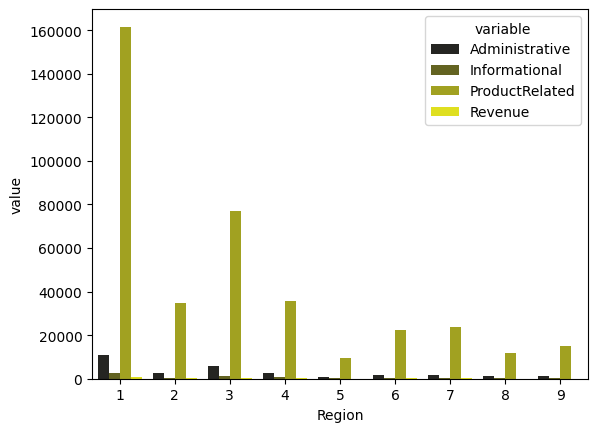

In [30]:
pages_under_Region = df.groupby('Region')[['Administrative', 'Informational', 'ProductRelated', 'Revenue']].sum()
pages_under_Region = pages_under_Region.sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False).reset_index()
print(pages_under_Region)

sns.barplot(data = pages_under_Region.melt(id_vars = 'Region'), x = 'Region', y = 'value', hue = 'variable', color = 'yellow')

Calculation of weekend and weekdays proportions

In [25]:
df['Weekend'].value_counts(normalize = True).reset_index()

,Weekend,proportion
0,False,0.767397
1,True,0.232603


Checking Total revenue class balance

In [27]:
df['Revenue'].value_counts(normalize = True).reset_index()

,Revenue,proportion
0,False,0.845255
1,True,0.154745


Checking for which type of visitors actually contributed more to revenue

In [37]:
counts = df.groupby('VisitorType')['Revenue'].value_counts().reset_index()
counts

,VisitorType,Revenue,count
0,New_Visitor,False,1272
1,New_Visitor,True,422
2,Other,False,69
3,Other,True,16
4,Returning_Visitor,False,9081
5,Returning_Visitor,True,1470


Total pages visited & Individual Revenue contribution for each type of Month

In [36]:
Monthly_page_views = df.groupby('Month')[['Administrative', 'Informational', 'ProductRelated', 'Revenue']].sum()
Monthly_page_views = Monthly_page_views.sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False).reset_index()
Monthly_page_views

,Month,Administrative,Informational,ProductRelated,Revenue
0,Nov,7847,1938,138024,760
1,May,6610,1426,89105,365
2,Dec,3793,885,48347,216
3,Mar,3600,802,37775,192
4,Oct,2042,268,18428,115
5,Sep,1494,254,14831,86
6,Aug,1358,235,16566,76
7,Jul,1047,223,15728,66
8,June,655,162,10387,29
9,Feb,100,16,2058,3


Calculation of total sessions where a user visited all types of pages

In [15]:
df['visited_all'] = (df['Administrative'] > 0) & (df['Informational'] > 0) & (df['ProductRelated'] > 0)
df['visited_all'].sum()

2167

Calculation of total sessions where a user visited all types of pages and also contributed to revenue

In [16]:
df['visited_all&Purchased'] = (df['Administrative'] > 0) & (df['Informational'] > 0) & (df['ProductRelated'] > 0) & (df['Revenue'] > 0)
df['visited_all&Purchased'].sum()

526

Finding correlation b/w Special day and revenue

In [17]:
variables_3 = df[['SpecialDay', 'Revenue']]
spearman_corr = variables_3.corr(method = 'spearman')
spearman_corr

,SpecialDay,Revenue
SpecialDay,1.000000,-0.086878
Revenue,-0.086878,1.000000


Investigating user session lengths and their impact on conversion rates.

                  Total_time_spent   Revenue
Total_time_spent          1.000000  0.220721
Revenue                   0.220721  1.000000


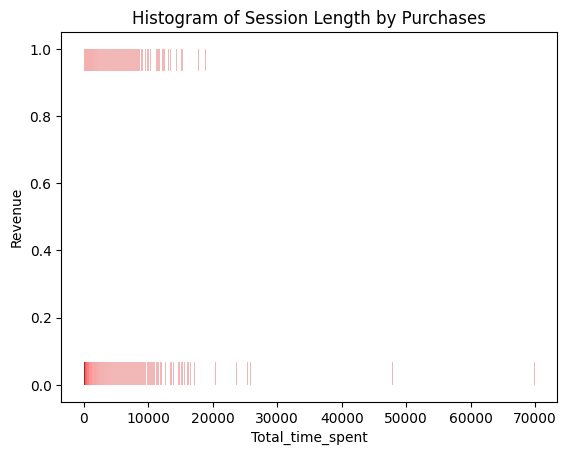

In [18]:
df['Total_time_spent'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

variables_4 = df[['Total_time_spent', 'Revenue']]
spearman_corr = variables_4.corr(method = 'spearman')
print(spearman_corr)


sns.histplot(data = df, x = 'Total_time_spent', y = 'Revenue', kde = True, color = 'red')
plt.title('Histogram of Session Length by Purchases')
plt.show()

Exploring PageValues distribution and its relationship with TrafficType, VisitorType, and Region.

TrafficType
1      8468.386672
2     32494.983720
3      6722.420075
4      7529.087303
5      2005.247088
6      2253.852296
7       542.693810
8      3533.735395
9       160.379441
10     2793.703633
11     1251.954486
12        0.000000
13     1737.684088
14       64.169261
15        1.385792
16        0.000000
17        0.000000
18        0.000000
19       59.457846
20     2995.408541
Name: PageValues, dtype: float64
<------------------------------------------>


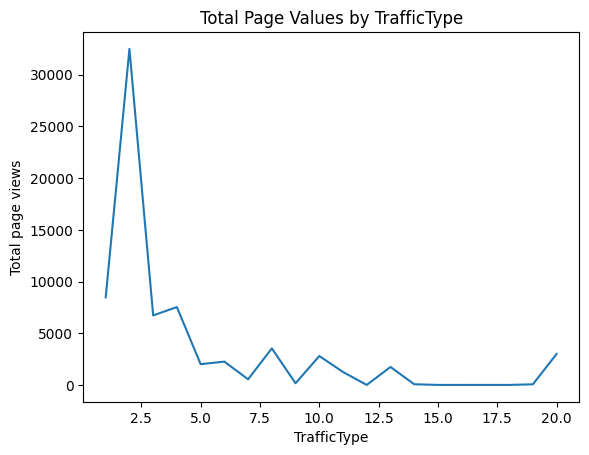

VisitorType
New_Visitor          18248.085596
Other                 1546.304039
Returning_Visitor    52820.159812
Name: PageValues, dtype: float64
<------------------------------------------>


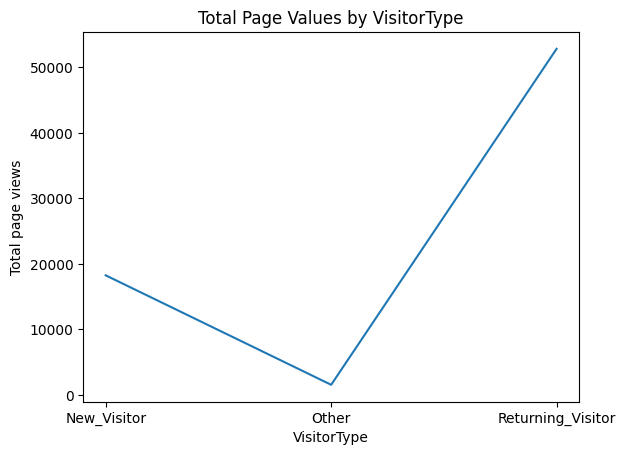

Region
1    28212.256912
2     6709.893181
3    12842.429647
4     6860.170650
5     2941.753454
6     3866.874528
7     4763.541048
8     1847.940453
9     4569.689575
Name: PageValues, dtype: float64
<------------------------------------------>


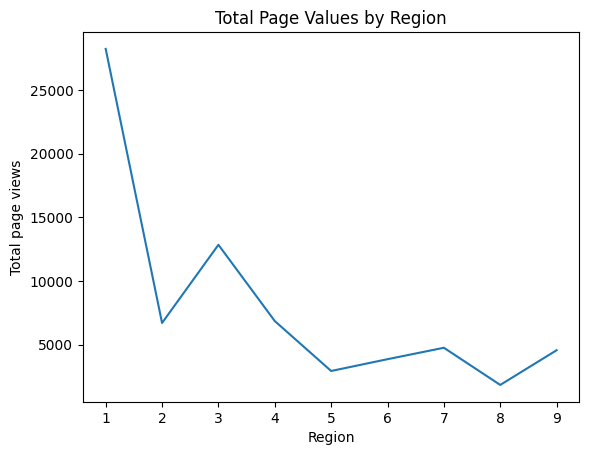

In [19]:
variables_5 = df[['TrafficType', 'VisitorType', 'Region']]

for variable in variables_5:
  grouped_data = df.groupby(variable)['PageValues'].sum()
  print(grouped_data)
  print("<------------------------------------------>")

  sns.lineplot(x = grouped_data.index, y = grouped_data.values)
  plt.title(f'Total Page Values by {variable}')
  plt.xlabel(variable)
  plt.ylabel('Total page views')
  plt.show()

Grouping users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates

VisitorType
New_Visitor           422
Other                  16
Returning_Visitor    1470
Name: Revenue, dtype: int64
<------------------------------------------>


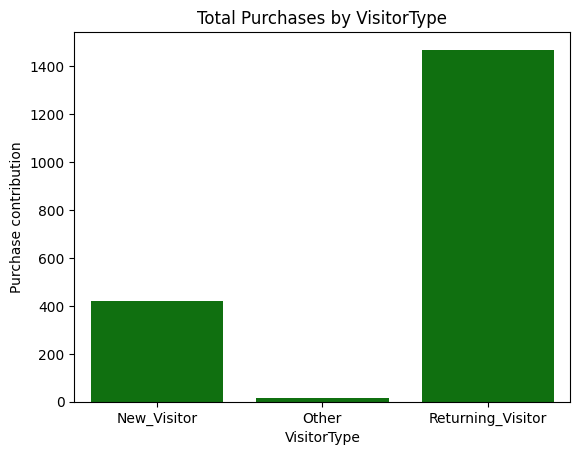

OperatingSystems
1     379
2    1155
3     268
4      85
5       1
6       2
7       1
8      17
Name: Revenue, dtype: int64
<------------------------------------------>


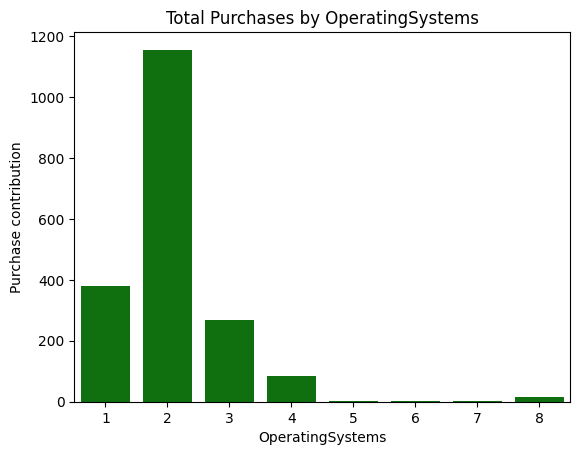

Region
1    771
2    188
3    349
4    175
5     52
6    112
7    119
8     56
9     86
Name: Revenue, dtype: int64
<------------------------------------------>


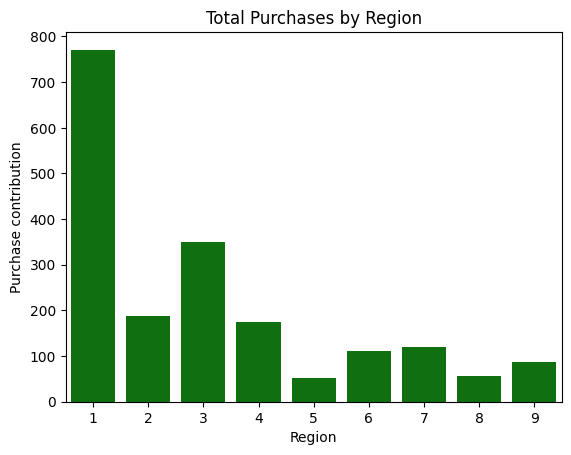

In [73]:
variables_6 = df[['VisitorType', 'OperatingSystems', 'Region']]

for variable in variables_6:
  grouped_data = df.groupby(variable)['Revenue'].sum()
  print(grouped_data)
  print("<------------------------------------------>")

  sns.barplot(x = grouped_data.index, y = grouped_data.values, color = 'green')
  plt.title(f'Total Purchases by {variable}')
  plt.xlabel(variable)
  plt.ylabel('Purchase contribution')
  plt.show()

Hypothesis testing: Performing One- way and Two way Anova to check relationship between Independent and dependent variable.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
df['Revenue'] = df['Revenue'].replace({True : 1, False: 0})
df['visited_all'] = df['visited_all'].replace({True : 1, False : 0})
df['visited_all&Purchased'] = df['visited_all&Purchased'].replace({True: 1, False : 0})
df['Weekend'] = df['Weekend'].replace({True : 1, False : 0})

In [23]:
# HO: There is no relationship betweeen dependent and independent variables.
# H1: There is a signifiant relationship between dependent and independent variables.

test = ols('Revenue ~ C(OperatingSystems) * C(Browser)', data =df).fit()
anova_table = sm.stats.anova_lm(test,typ= 1)
print(anova_table)

                                     df       sum_sq   mean_sq          F  \
C(OperatingSystems)                 7.0     9.813438  1.401920  10.801121   
C(Browser)                         12.0     1.867781  0.155648   1.199197   
C(OperatingSystems):C(Browser)     84.0     8.962134  0.106692   0.822011   
Residual                        12288.0  1594.907520  0.129794        NaN   

                                      PR(>F)  
C(OperatingSystems)             1.194180e-13  
C(Browser)                      2.766328e-01  
C(OperatingSystems):C(Browser)  8.799230e-01  
Residual                                 NaN  


In [24]:
test = ols('Revenue ~ C(visited_all)', data =df).fit()
anova_table = sm.stats.anova_lm(test,typ= 1)
print(anova_table)

                     df       sum_sq    mean_sq           F        PR(>F)
C(visited_all)      1.0    20.353573  20.353573  157.573355  6.359801e-36
Residual        12328.0  1592.393872   0.129169         NaN           NaN


In [25]:
test = ols('Revenue ~ C(SpecialDay)', data =df).fit()
anova_table = sm.stats.anova_lm(test,typ= 1)
print(anova_table)

                    df       sum_sq   mean_sq          F        PR(>F)
C(SpecialDay)      5.0    12.566730  2.513346  19.356862  3.003311e-19
Residual       12324.0  1600.180715  0.129843        NaN           NaN


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install nbconvert

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [3]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/E-commerce shopping dataset.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/E-commerce shopping dataset.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][20]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': 'Administrative                4.000000\n'
         'Administrative_Duration  ...'}
[NbConvertApp] Support files will be in E-commerce shopping dataset_files/
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making directory ./E-commerce shopping dataset_files
[NbConvertApp] Making dire